In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import yfinance as yf
from scipy.stats import norm

# Value at Risk


Aqui faremos o VAR, diário e Semanal, da ação ITUB4.SA

Usaremos 2 métodos:

- Método da série histórica, usa puramente a série histórica e não faz mais nenhuma suposição sobre os retornos.
- Método da variância, usaremos a série histórica para pegarmos a média e a variância dos retornos, com isso construiremos uma normal, e iremos inferir o VAR supondo que os retornos se dão por essa distribuição.

In [4]:
C1_day = yf.download('ITUB4.SA', start='2023-01-01', end='2023-12-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
price_itau_day = C1_day['Open']
price_itau_day.head()

Ticker,ITUB4.SA
Date,
2023-01-02,21.742627
2023-01-03,21.796031
2023-01-04,21.413334
2023-01-05,21.448937
2023-01-06,22.187633


In [6]:
return_day = []

for i in range(0,len(price_itau_day)-1):
  calc_return = (price_itau_day['ITUB4.SA'].iloc[i+1] - price_itau_day['ITUB4.SA'].iloc[i])/price_itau_day['ITUB4.SA'].iloc[i]
  return_day.append(calc_return)

return_day = np.array(return_day)

In [7]:
C1_week = yf.download('ITUB4.SA', start='2023-01-01', end='2023-12-01', interval = '1wk')

[*********************100%***********************]  1 of 1 completed


In [8]:
price_itau_week = C1_week['Open']
price_itau_week.head()

Ticker,ITUB4.SA
Date,
2023-01-01,21.727282
2023-01-08,22.249937
2023-01-15,22.917432
2023-01-22,23.175525
2023-01-29,22.241029


In [9]:
return_week = []

for i in range(0,len(price_itau_week)-1):
  calc_return = (price_itau_week['ITUB4.SA'].iloc[i+1] - price_itau_week['ITUB4.SA'].iloc[i])/price_itau_week['ITUB4.SA'].iloc[i]
  return_week.append(calc_return)

return_week = np.array(return_week)

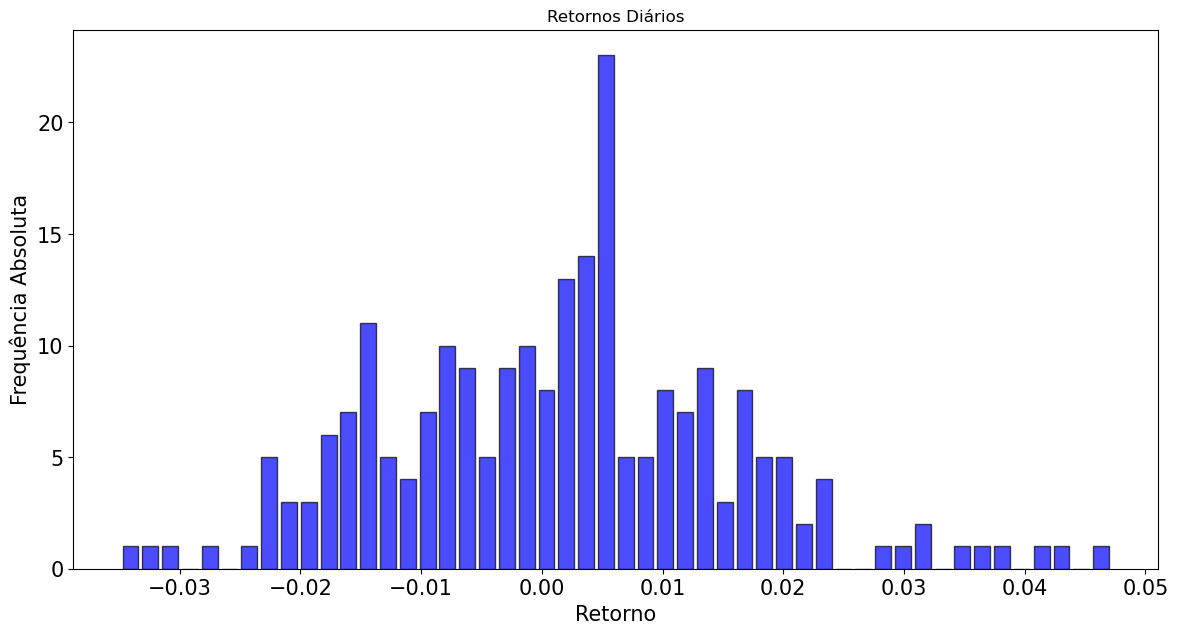

In [10]:
plt.figure(figsize=(14,7))
plt.title('Retornos Diários')
plt.xlabel('Retorno', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.hist(return_day, 50, rwidth=0.8, color='blue', alpha=0.7, edgecolor='black')
plt.show()

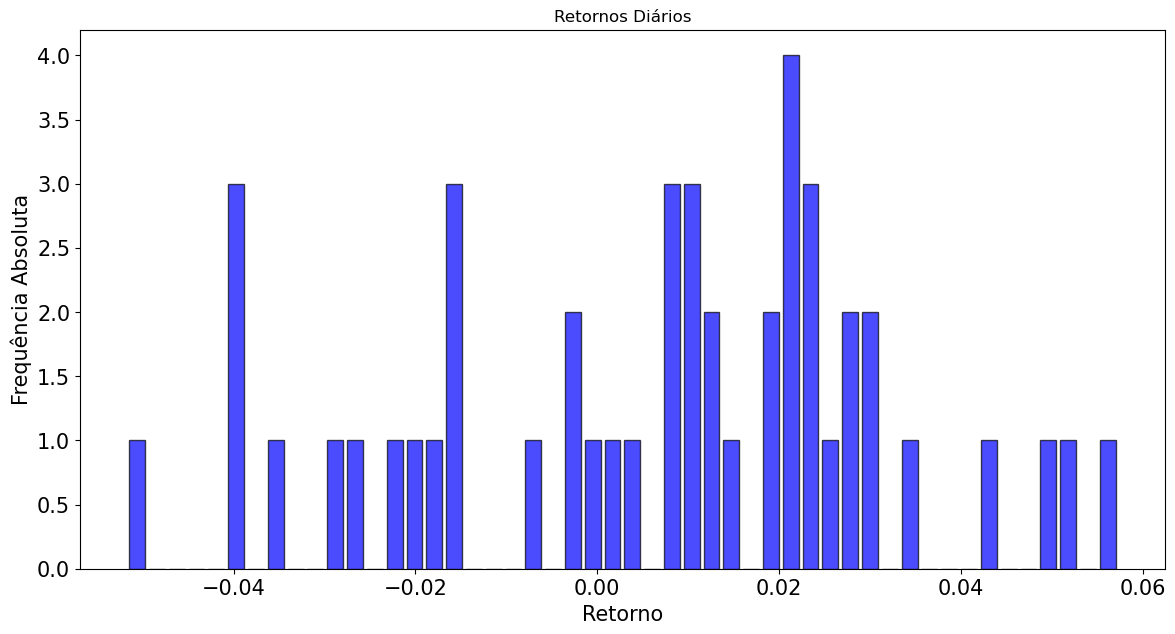

In [11]:
plt.figure(figsize=(14,7))
plt.title('Retornos Diários')
plt.xlabel('Retorno', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.hist(return_week, 50, rwidth=0.8, color='blue', alpha=0.7, edgecolor='black')
plt.show()

## Método Histórico

In [13]:
#Sorting
sort_return_day = return_day.copy()
sort_return_day.sort()


sort_return_week = return_week.copy()
sort_return_week.sort()

### Nível de confiança $ P \approx 90\% $

In [15]:
ret_day_10 = sort_return_day[0:int(len(sort_return_day)/10)]
ret_week_10 = sort_return_week[0:int(len(sort_return_week)/10)]

Análise VAR

In [17]:
ret_day_10[-1], ret_week_10[-1]

(-0.017523672451592805, -0.03881512100713254)

- Série diária: 10% dos retornos são menores que $-1.75\% $ -> VaR é de $1.75\%$ do investimento com nível de confiança de $ 90\%$

- Série Semanal: 10% dos retornos são menores que $-3.8\%$ -> VaR é de $3.8\%$ do investimento com nível de confiança de $ 90\%$

### Nível de confiança $ P \approx 95\% $

In [20]:
ret_day_5 = sort_return_day[0:int(len(sort_return_day)/20)]
ret_week_5 = sort_return_week[0:int(len(sort_return_week)/20)]

Análise VAR

In [22]:
ret_day_5[-1], ret_week_5[-1]

(-0.021121321585561723, -0.040550682828186184)

- Série diária: 5% dos retornos são menores que $-2.11\% $ -> VaR é de $2.11\%$ do investimento com nível de confiança de $ 95\%$

- Série Semanal: 5% dos retornos são menores que $-4.05\%$ -> VaR é de $4.05\%$ do investimento com nível de confiança de $ 95\%$

## Método da Variância

In [25]:
hat_m_day = sum(return_day)/len(return_day) #  Estimativa da média dos retornos série diária
hat_m_week = sum(return_week)/len(return_week) #  Estimativa da média dos retornos série quinzenal

hat_sig_day = sum(((return_day-hat_m_day*np.ones(len(return_day)))**2)/(len(return_day)-1))**0.5 # Estimativa da stdp dos retornos série diária
hat_sig_week = sum(((return_week-hat_m_week*np.ones(len(return_week)))**2)/(len(return_week)-1))**0.5 # Estimativa da stdp dos retornos série quinzenal

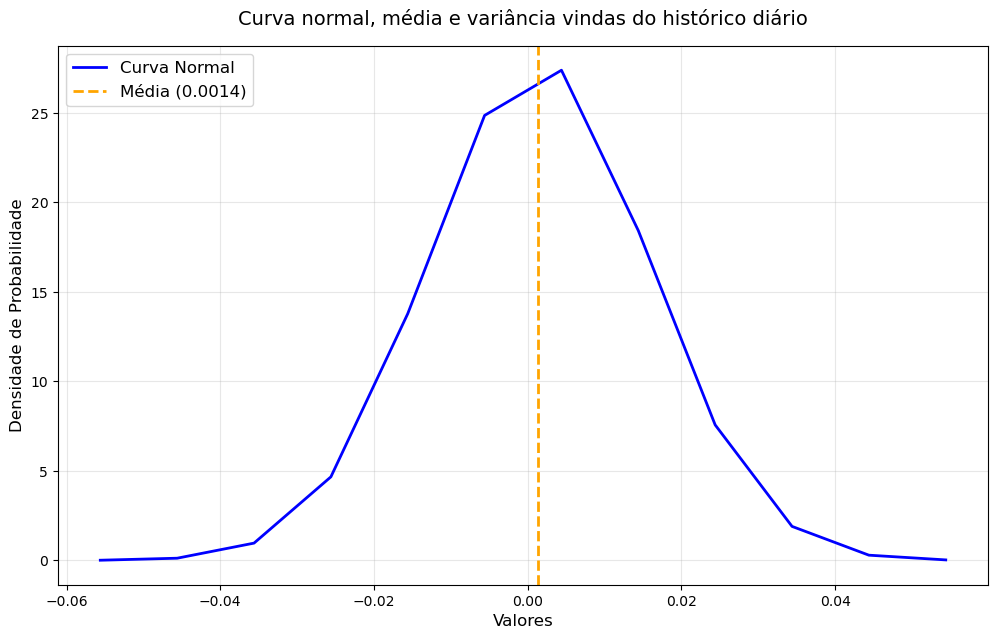

Média 0.0013508201416180178, variância 0.014240481102031171, desvio padrão 0.11933348692647497


In [26]:

intervalo = np.arange(hat_m_day- 4*hat_sig_day, hat_m_day + 4*hat_sig_day, 0.01)
  
plt.figure(figsize=(12, 7))  
plt.plot(intervalo, norm.pdf(intervalo, hat_m_day, hat_sig_day), color='blue', lw=2, label='Curva Normal')

plt.axvline(hat_m_day, color='orange', linestyle='--', lw=2, label=f'Média ({hat_m_day:.4f})')

plt.title('Curva normal, média e variância vindas do histórico diário', fontsize=14, pad=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)

plt.show()

print(f'Média {hat_m_day}, variância {hat_sig_day}, desvio padrão {hat_sig_day**(1/2)}')


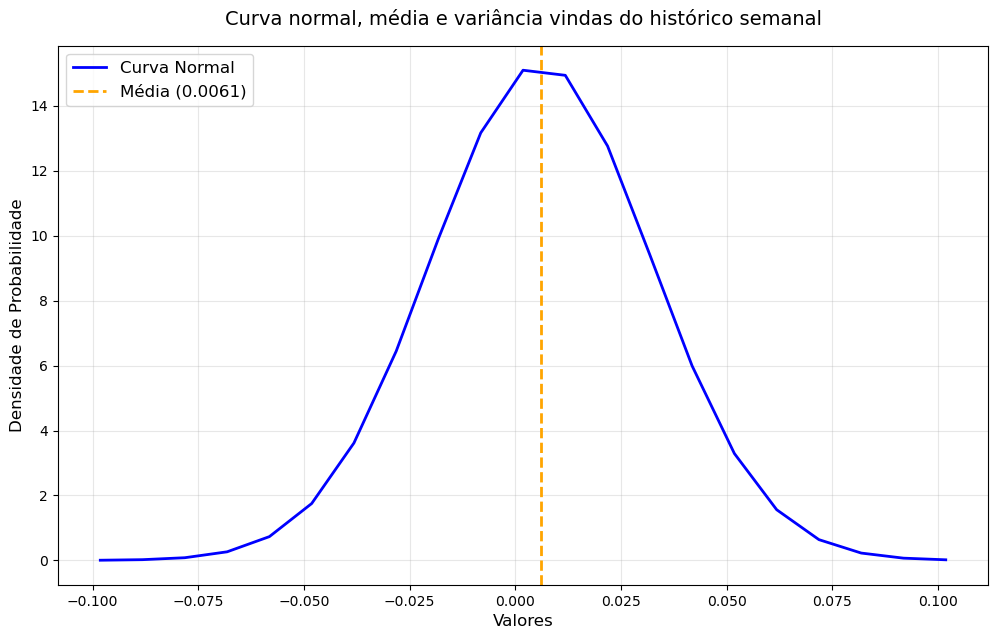

Média 0.006103695436960606, variância 0.026072619642881965, desvio padrão 0.16147018190019471


In [27]:

intervalo = np.arange(hat_m_week- 4*hat_sig_week, hat_m_week + 4*hat_sig_week, 0.01)

plt.figure(figsize=(12, 7))  
plt.plot(intervalo, norm.pdf(intervalo, hat_m_week, hat_sig_week), color='blue', lw=2, label='Curva Normal')

plt.axvline(hat_m_week, color='orange', linestyle='--', lw=2, label=f'Média ({hat_m_week:.4f})')

plt.title('Curva normal, média e variância vindas do histórico semanal', fontsize=14, pad=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)

plt.show()

print(f'Média {hat_m_week}, variância {hat_sig_week}, desvio padrão {hat_sig_week**(1/2)}')


### Nível de confiança $ P = 90\% $

Sabemos pela tabela da distribuição normal que:

  - $ 10\% $ dos valores estão abaixo de $ \mu - 1.28\sigma $

Análise VAR

In [31]:
alpha = 0.10 # intervalo de confiança é 1-alpha -> 0.9

vard_10 = norm.ppf(alpha, hat_m_day, hat_sig_day)
varw_10 = norm.ppf(alpha, hat_m_week, hat_sig_week)

(vard_10, varw_10)

(-0.016899090708798324, -0.027309711084223677)

Série diária: 10% dos retornos são menores que $-1.68\% $ -> VaR é de $1.68\%$ do investimento com nível de confiança de $ 90\%$

Série Semanal: 10% dos retornos são menores que $-2.73\%$ -> VaR é de $2.73\%$ do investimento com nível de confiança de $ 90\%$

### Nível de confiança $ P = 95\% $

Sabemos pela tabela da distribuição normal que:

  - $ 5\% $ dos valores estão abaixo de $ \mu - 1.65\sigma $

Análise Var

In [36]:
alpha = 0.05 # intervalo de confiança é 1-alpha -> 0.9

vard_5 = norm.ppf(alpha, hat_m_day, hat_sig_day)
varw_5 = norm.ppf(alpha, hat_m_week, hat_sig_week)

(vard_5, varw_5)

(-0.02207268684859186, -0.03678194754676001)

Série diária: 5% dos retornos são menores que $-2.20\% $ -> VaR é de $2.20\%$ do investimento com nível de confiança de $ 95\%$

Série Semanal: 5% dos retornos são menores que $-3.67\%$ -> VaR é de $3.67\%$ do investimento com nível de confiança de $ 95\%$